In [ ]:
def return_parameters(parameters_file : str):
    with open(parameters_file, 'r') as f:
        f.readline()
        sizeof_float = (int)(f.readline())
        f.readline()
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        f.readline()
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        return sizeof_float, TIME, dt, DTS, SIZE_X, SIZE_Y

In [ ]:
import os
import sys
import numpy as np

        
def set_fap_txtdata(file_to_read : str, field : list, TIME : int, DTS : int):
    field.clear()
    with open(file_to_read, 'r') as f:
        next(f)
        for t in range(int(TIME/DTS)):
            field.append((float)(f.readline()))
            
def set_fap_bindata(file_to_read : str, field : list, sizeof_float=4):
    dtype = np.float32
    
    with open(file_to_read, 'br') as f:
        temp = np.fromfile(f, dtype=dtype, count=int(TIME/DTS))
        np.copyto(field, temp)

        
def set_fal_data(t : int, field, field_to_read : str, sizeof_float : int, SIZE : int):
    dtype = np.float32
    
    with open(field_to_read, 'br') as f:
        f.seek((t*SIZE)*sizeof_float, os.SEEK_SET)
        temp = np.fromfile(f, dtype=dtype, count=SIZE)
        np.copyto(field, temp)
      
    
def set_tdf_data(t : int, field, field_to_read : str, sizeof_float : int, SIZE_X : int, SIZE_Y : int):
    dtype = np.float32
    
    with open(field_to_read, 'br') as f:
        f.seek((t*SIZE_X*SIZE_Y)*sizeof_float, os.SEEK_SET)
        temp = np.fromfile(f, dtype=dtype, count=SIZE_X*SIZE_Y)
        np.copyto(field, temp.reshape(SIZE_Y, SIZE_X))


In [ ]:
import matplotlib.pyplot as plt


def set_imshow(subplot, Field: list, cmap_: str, v : tuple, SIZE_X : int, SIZE_Y : int):
    return subplot.imshow(
        Field[SYB:SYE,SXB:SXE],#
        cmap = plt.get_cmap(cmap_),
        interpolation="gaussian",
        origin='lower',
        extent=(SXB,SXE,SYB,SYE),#
        vmin=v[0], vmax=v[1],
    )

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


def set_colorbar(mappable, vmin_vmax):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = fig.colorbar(mappable,
                       orientation="vertical",
                       cax=cax)
    cbar.set_ticks(list(np.linspace(vmin_vmax[0], vmin_vmax[1], num=5)))
    cbar.ax.tick_params(labelsize=tick_size)
    plt.sca(last_axes)
    return cbar


In [ ]:
def set_fap_whdata(field : dict, TIME : int, DTS : int):
    
    for name in field.keys():
        
        f = field[ name ]
        
        if ( '_s' not in name ):
            if ((f['file_to_read'])[-4:] == '.txt'):            
                set_fap_txtdata( f['file_to_read'], f['data'], TIME, DTS )
            elif ((f['file_to_read'])[-4:] == '.bin'):
                set_fap_bindata( f['file_to_read'], f['data'] )
        else:
            f_s = field[name[:-2]]
            f['data'] = (f_s['data'])[ int((f['t_range'])[0]/DTS) : int((f['t_range'])[-1]/DTS+1) ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def set_fap_plot(axes, field : dict):    
    
    for name in field.keys():
        
        f = field[ name ]
        
        #ax = axes[ f['axes_position'] ]
         
        ax = axes
        ax.set_title( f['axes_name'], fontsize=title_fontsize )
        if ( '_s' not in name ):
            ax.plot( ((f['t_range'])[int(TINJ/DTS):])*dt, (np.asarray((f['data'])) + Bm0)[int(TINJ/DTS):], color=f['color'] )
            #ax.set_xlabel( f['xlabel'], fontsize=labels_fontsize )
            #ax.set_ylabel( f['ylabel'], fontsize=labels_fontsize )
            #ax.tick_params(axis='both',which='major',labelsize=tick_size)

        else:
            #f_s = field[name[:-2]]
            #axes[ f_s['axes_position'] ].plot( (f['t_range'])*dt, f['data'], color=f['color'] )
            
            ax = axes #[ f['axes_position'] ]
            #ax.plot( (f['t_range'])*dt, np.asarray((f['data'])) + Bm0, color=f['color'] )
            #ax.set_xlabel( f['xlabel'], fontsize=labels_fontsize )
            #ax.set_ylabel( f['ylabel'], fontsize=labels_fontsize )
            #ax.tick_params(axis='both',which='major',labelsize=tick_size)

            

def set_fal_plot(axes, ddata_name : list, ddata_enum : dict, SIZE):
    ax = axes[ ddata_name[ddata_enum['axes_position']] ]
    
    ax.set_title ( ddata_name[ ddata_enum['axes_name'] ], fontsize=title_fontsize )
    ax.set_xlabel( ddata_name[ ddata_enum['xlabel'] ], fontsize=labels_fontsize )
    ax.set_ylabel( ddata_name[ ddata_enum['ylabel'] ], fontsize=labels_fontsize )
    ax.set_xlim  ( (0,SIZE) )
    vmm = ddata_name[ ddata_enum['vmin_vmax'] ]
    ax.set_ylim  ( vmm )
    ax.set_xticks(list(np.linspace(SXB, SXE, num=5)))
    ax.set_yticks(list(np.linspace(vmm[0], vmm[1], num=5)))
    
    if ( (ddata_name[ddata_enum['file_to_read']])[-6:-4] == 'Bx'):
        ddata_name[ddata_enum['frame_data']] += Bmx0
    
    pl_ = ax.plot( range(SIZE)[:], (ddata_name[ ddata_enum['frame_data'] ])[:], color=ddata_name[ ddata_enum['colormap'] ] )
    

def set_tdf_plot(axes, cbars : list, ddata_name : list, ddata_enum : dict, SIZE_X, SIZE_Y,
                 current_shape_is_shown = False):
    
    ax = axes[ ddata_name[ddata_enum['axes_position']] ]
    
    ax.set_title( ddata_name[ ddata_enum['axes_name'] ], fontsize=title_fontsize)
    ax.set_xlabel( ddata_name[ ddata_enum['xlabel'] ], fontsize=labels_fontsize )
    ax.set_ylabel( ddata_name[ ddata_enum['ylabel'] ], fontsize=labels_fontsize )
    ax.tick_params(axis='both',which='major',labelsize=tick_size)
    ax.set_xticks(list(np.linspace(SXB, SXE, num=5)))
    ax.set_yticks(list(np.linspace(SYB, SYE, num=5)))
    
    
    if ( (ddata_name[ddata_enum['file_to_read']])[-6:-4] == 'Bx'):
        ddata_name[ddata_enum['frame_data']] += Bmx0
        
    if ( (ddata_name[ddata_enum['file_to_read']])[-6:-4] == 'By'):
        ddata_name[ddata_enum['frame_data']] += Bmy0
    
    im_ = set_imshow(ax,
        ddata_name[ddata_enum['frame_data']],
        ddata_name[ddata_enum['colormap']],
        ddata_name[ddata_enum['vmin_vmax']],
        SIZE_X, SIZE_Y)
        
    cbars.append(set_colorbar(im_, ddata_name[ddata_enum['vmin_vmax']]))    

In [ ]:
def clear_whole_figure(len_ddata, axes, cbars, nrows, ncols):
    for i in range(nrows):
        for j in range(ncols):
            if (len_ddata == 1):
                axes.cla()
            elif (nrows == 1):
                axes[j].cla()
            else:
                axes[i,j].cla()
    
    for i in range(len(cbars)):
        cbars[i].remove()

d:\python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.1182]


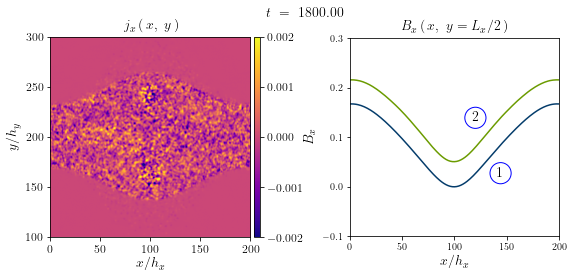

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'''

\usepackage[english,russian]{babel}

''')

title_fontsize=14
labels_fontsize=14
tick_size=12

import numpy as np

sizeof_float, TIME, dt, DTS, SIZE_X, SIZE_Y = return_parameters("./TIME100000_TINJ50000/fields/whole_field/parameters.txt")


TIME = 99000
TINJ = 50000
TINJ_ = int(50000/DTS)

'''
fpdata = {
    
    'B1xv'   : { 't_range': np.asarray(range(0, TIME, DTS)),
               'data': np.zeros(int(TIME/DTS)),
               'file_to_read' : './MAGNETIC_MIRRORS_R_LARM1.72/TIME100000_TINJ50000/fields/field_at_point/Bx.bin',
               'axes_position' : (0),
               'axes_name': '$B_x\,(\,x = Lx/2,~y = Ly/2,~t\,)$',
               'ylabel': '$B_x$',
               'xlabel': '$t$',
               'color': '#3F8FD2',
             },
    'B1xv_s' : { 't_range': np.asarray(range(TINJ, TIME, DTS)),
               'data': np.zeros(int(TIME/DTS)),
               'axes_position' : (0),
               'axes_name': '$B_x\,(\,x = Lx/2,~y = Ly/2,~t\,)$', 
               'ylabel': '$B_x$',
               'xlabel': '$t$',  
               'color': '#043C6B',
             },
    'B1xp'   : { 't_range': np.asarray(range(0, TIME, DTS)),
               'data': np.zeros(int(TIME/DTS)),
               'file_to_read' : './TIME100000_TINJ50000/fields/field_at_point/Bx.bin',
               'axes_position' : (0),
               'axes_name': '$B_x\,(\,x = Lx/2,~y = Ly/2,~t\,)$',
               'ylabel': '$B_x$',
               'xlabel': '$t$',
               'color': '#A5EF00',
             },
    'B1xp_s' : { 't_range': np.asarray(range(TINJ, TIME, DTS)),
               'data': np.zeros(int(TIME/DTS)),
               'axes_position' : (0),
               'axes_name': '$B_x\,(\,x = Lx/2,~y = Ly/2,~t\,)$', 
               'ylabel': '$B_x$',
               'xlabel': '$t$',  
               'color': '#6B9B00',
             },
}
'''
Bm0 = np.zeros(1)
with open("./MAGNETIC_MIRRORS_R_LARM1.72/MIRROR_FIELDS/fields/field_at_point/Bx.bin", 'br') as f:
        temp = np.fromfile(f, dtype=np.float32, count=1)
        np.copyto(Bm0, temp)
print(Bm0)


faldata = {
    
    #'name': ["file.bin", [frame_data], (axes_position), "axes_name", "xlabel", "ylabel" (vmin, vmax), "colormap"]
    'BVx': [ "./MAGNETIC_MIRRORS_R_LARM1.72/TIME100000_TINJ50000/fields/field_along_X/Bx.bin", np.zeros(SIZE_X), (1), "$B_x\,(\,x,~y = L_x/2\,)$", "$x/h_x$", "$B_x$", (-0.1, 0.3), '#043C6B' ],
    'BPx': [ "./TIME100000_TINJ50000/fields/field_along_X/Bx.bin", np.zeros(SIZE_X), (1), "$B_x\,(\,x,~y = L_x/2\,)$", "$x/h_x$", "$B_x$", (-0.1, 0.3), '#6B9B00' ],
    #'off': [ "", [], (2,1), "", "$", (), ""], 

}

tdfdata = {
    
    #'name': ["file.bin", [frame_data], (axes_position), "axes_name", "xlabel", "ylabel" (vmin, vmax), "colormap"]
    #'jP200x': [ "./TIME100000_TINJ50000/fields/whole_field/jx.bin", np.zeros((SIZE_Y, SIZE_X)), (0,0), "$j_x^P\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-1e-3, 1e-3), "plasma" ],
    'jPx': [ "./TIME100000_TINJ50000/fields/whole_field/jx.bin", np.zeros((SIZE_Y, SIZE_X)), (0), "$j_x\,(\,x,~y\,)$", "$x/h_x$", "$y/h_y$", (-2e-3, 2e-3), "plasma" ],
    #'off': [ "", [], (2,1), "", "$", (), ""], 

}

ddata_enum = {
    
    'file_to_read':     0,
    'frame_data':       1,
    'axes_position':    2,
    'axes_name':        3,
    'xlabel':           4,
    'ylabel':           5,
    'vmin_vmax':        6,
    'colormap':         7,

}

SXB = 0
SXE = SIZE_X
SYB = 100
SYE = 300

Bmx0 = np.zeros(SIZE_X)
set_fal_data(0, Bmx0, "./MAGNETIC_MIRRORS_R_LARM1.72/MIRROR_FIELDS/fields/field_along_X/Bx.bin", sizeof_float, SIZE_X)


nrows = 1
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8.27,11.69))

box = {
    'facecolor':'w',
    'edgecolor':'g',
    'boxstyle':'circle',
    'linewidth':'3',
}

box1 = {
    'facecolor':'w',
    'edgecolor':'b',
    'boxstyle':'circle',
    'linewidth':'1',
}
#set_fap_whdata(fpdata, TIME, DTS)
#set_fap_plot(axes, fpdata)


t = 900

set_fal_data(t, faldata['BVx'][ddata_enum['frame_data']],
                faldata['BVx'][ddata_enum['file_to_read']],
                sizeof_float, SIZE_X)

set_fal_data(t, faldata['BPx'][ddata_enum['frame_data']],
                faldata['BPx'][ddata_enum['file_to_read']],
                sizeof_float, SIZE_X)

set_fal_plot(axes, faldata['BVx'], ddata_enum, SIZE_X)    
set_fal_plot(axes, faldata['BPx'], ddata_enum, SIZE_X)    


imshows = []
cbars = []

set_tdf_data(t, tdfdata['jPx'][ddata_enum['frame_data']],
                tdfdata['jPx'][ddata_enum['file_to_read']],
                sizeof_float, SIZE_X, SIZE_Y)
        
set_tdf_plot(axes, cbars, tdfdata['jPx'], ddata_enum, SIZE_X, SIZE_Y)
    
    
axes[0].text(+1.08, 1.1, "$t~=~%.2f$" %(DTS*t*dt), transform=axes[0].transAxes, fontsize=title_fontsize)


pos = axes[0].get_position()
pos.x0 = pos.x0 - 0.04
pos.x1 = pos.x1 - 0.04
axes[0].set_position(pos)
    
pos = axes[1].get_position()
pos.x0 = pos.x0 + 0.04
pos.x1 = pos.x1 + 0.04
pos.y0 = pos.y0 + 0.26
pos.y1 = pos.y1 - 0.26
axes[1].set_position(pos)
    
#pos = axes[1,0].get_position()
#pos.x0 = pos.x0 - 0.03
#pos.x1 = pos.x1 - 0.03
#pos.y0 = pos.y0 + 0.09
#pos.y1 = pos.y1 + 0
#axes[1,0].set_position(pos)
    
#pos = axes[1,1].get_position()
#pos.x0 = pos.x0 + 0.03
#pos.x1 = pos.x1 + 0.03
#pos.y0 = pos.y0 + 0.09
#pos.y1 = pos.y1 + 0.09
#axes[1,1].set_position(pos)
    
#pos = axes.get_position()
#pos.x0 = pos.x0 #- 0.02
#pos.x1 = pos.x1 #+ 0.1
#pos.y0 = pos.y0 + 0.22 #- 0.08
#pos.y1 = pos.y1 - 0.22 #- 0.08
#axes.set_position(pos)
    
#axes[0,0].text(-0.05, 1.1, '$a$', bbox=box, horizontalalignment='center', color='black', transform=axes[0,0].transAxes, fontsize=title_fontsize)
#axes[1,0].text(-0.05, 1.1, '$b$', bbox=box, horizontalalignment='center', color='black', transform=axes[1,0].transAxes, fontsize=title_fontsize)
#axes[2,0].text(-0.02, 1.1, '$c$', bbox=box, horizontalalignment='center', color='black', transform=axes[2,0].transAxes, fontsize=title_fontsize)
axes[1].text(+0.60, +0.58, '$2$', bbox=box1, horizontalalignment='center', color='black', transform=axes[1].transAxes, fontsize=title_fontsize)
axes[1].text(+0.72, +0.3, '$1$', bbox=box1, horizontalalignment='center', color='black', transform=axes[1].transAxes, fontsize=title_fontsize)
#axes[1].text(+0.27, +0.20, '$1$', bbox=box1, horizontalalignment='center', color='black', transform=axes[1].transAxes, fontsize=title_fontsize)
#axes[1].text(+0.36, +0.56, '$2$', bbox=box1, horizontalalignment='center', color='black', transform=axes[1].transAxes, fontsize=title_fontsize)

name = str(t).zfill(len(str(int(TIME/DTS)-1)))
fig.savefig("./2d3vAX_jx~Ex(tot).pdf")
    
plt.show()
#clear_whole_figure(1, axes, cbars, nrows, ncols)
